In [1]:
## Example of the generation of a PCFG;  and plots of useful quantities.
import logging
logging.basicConfig(level=logging.INFO,format='%(asctime)s %(message)s')
logging.info("Starting logging to console.")

2019-05-04 11:52:13,271 Starting logging to console.


In [2]:
import sys
import math
import numpy as np
sys.path.append('../syntheticpcfg')
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from importlib import reload

In [3]:
import inside
import pcfg
import utility


In [4]:
import pcfgfactory


pcfgfactory1 = pcfgfactory.PCFGFactory()
pcfgfactory1.lexical_distribution = pcfgfactory.LogNormalPrior(sigma=3)
pcfgfactory1.length_distribution.cds()

In [5]:
pcfgfactory1.cfgfactory.number_terminals = 20000
pcfgfactory1.cfgfactory.number_nonterminals = 10
pcfgfactory1.cfgfactory.binary_rules = 40
pcfgfactory1.cfgfactory.lexical_rules = 20000

# Parameters for controlling how we train the binary rule parameters.
pcfgfactory.LENGTH_EM_ITERATIONS = 100
## A limit on the length of examples for efficiency purposes.

pcfgfactory.LENGTH_EM_MAX_LENGTH = 30
# This parameter controls how close the length distribution of the grammar needs to be
# to the desired distribution.
## This is very close and may be slow to converge.
pcfgfactory.TERMINATION_KLD = 0.01

In [6]:
import random
import numpy.random
seed = 1  # was 4
random.seed(seed)
rng = numpy.random.RandomState(seed = seed)


In [7]:
upcfg = pcfgfactory1.sample()    

2019-05-04 11:53:08,978 CFG nominally has 10 nonterminals, 20000 terminals, 40 binary_rules and 20000 lexical rules
2019-05-04 11:53:09,068 Final CFG has 10 nonterminals, 13027 terminals, 40 binary_rules and 20000 lexical rules
2019-05-04 11:53:09,089 Training with LENGTH_EM_MAX_LENGTH 30 
2019-05-04 11:53:09,090 Target LP = -467567.506811, -467567.506811
2019-05-04 11:53:09,091 Starting EM iteration 0, target = -467567.506811
2019-05-04 11:53:10,070 LP = -929020.639481
2019-05-04 11:53:10,071 KLD from target 2.317230
2019-05-04 11:53:10,073 Starting EM iteration 1, target = -467567.506811
2019-05-04 11:53:10,933 LP = -486424.191034
2019-05-04 11:53:10,935 KLD from target 0.094691
2019-05-04 11:53:10,936 Starting EM iteration 2, target = -467567.506811
2019-05-04 11:53:11,800 LP = -478830.877338
2019-05-04 11:53:11,802 KLD from target 0.056560
2019-05-04 11:53:11,802 Starting EM iteration 3, target = -467567.506811
2019-05-04 11:53:12,691 LP = -474596.526889
2019-05-04 11:53:12,692 KLD

In [8]:
upcfg.expected_length()

4.687471125841121

In [9]:
rng = numpy.random.RandomState(seed = seed)
sampler = pcfg.Sampler(upcfg,random=rng)
sampler.sample_string()

['dbvvh',
 'oudff',
 'vnrku',
 'hfgar',
 'vgxdb',
 'tiwfr',
 'efhcm',
 'xlzgl',
 'dzogf',
 'vnrku',
 'avigd',
 'avigd']

Empirical Mean 4.665200


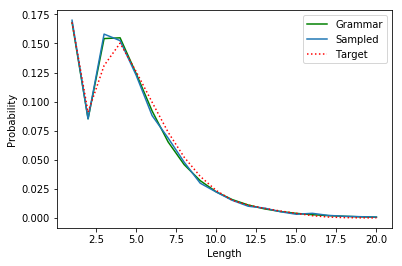

In [10]:

target = pcfgfactory1.length_distribution.weights
L = len(target)
lpcfg = upcfg.make_unary()
linsider = inside.UnaryInside(lpcfg)
table = linsider.compute_inside_smart(L)

showall = False
if showall:
    ## Here we print the distributions for each nonterminal.
    for k,nt in enumerate(linsider.nts):
        x = []
        y = []
        for i in range(1,L):
            x.append(i)
            p = table[i,k]
            y.append(p)

        ## Plot the true distribution of lengths.
        plt.plot(x,y, 'b',label = nt,alpha=0.25)
        #plt.yscale('log')
else:
    x = []
    y = []
    k = linsider.ntindex['S']
    for i in range(1,L):
        x.append(i)
        p = table[i,k]
        y.append(p)

    ## Plot the true distribution of lengths.
    plt.plot(x,y,'g', label = 'Grammar')
    
    n_samples = 10000
    total = 0.0
    n = 0
    
    lengths = Counter()
    for i in range(n_samples):
        try:
            s = utility.collect_yield(sampler.sample_tree())
            lengths[len(s)] += 1
            total += len(s)
            n += 1
        except ValueError:
            pass
    print("Empirical Mean %f" % (total/n))


    x = range(1, L)
    y = [ lengths[i]/n for i in x]
    plt.plot(x,y,label="Sampled")
## Plot the desired distribution of lengths.

xt = range(1, len(target))
yt = [ target[i]/sum(target) for i in xt]
plt.plot(xt,yt,"r:",label = "Target")
plt.legend()
plt.ylabel("Probability")
plt.xlabel("Length")
#plt.xticks(x)
#plt.yscale('log')
plt.show()

('S', ('NT6', ('NT7', ('NT2', 'fqgpo'), ('NT2', 'gzutb')), ('NT9', ('NT2', 'lsxiq'), ('NT1', ('NT5', ('NT9', 'himze'), ('NT5', 'fabwk')), ('NT5', ('NT1', ('NT1', ('NT5', ('NT1', ('NT5', 'vqvop'), ('NT4', ('NT6', ('NT7', ('NT8', 'xkhra'), ('NT7', 'jlqkg')), ('NT9', 'xarfy')), ('NT9', 'utbvv'))), ('NT4', 'grbsu')), ('NT4', ('NT6', ('NT9', 'fpqki'), ('NT5', ('NT7', ('NT8', 'lktyh'), ('NT7', 'zbdrg')), ('NT2', 'trtdw'))), ('NT4', 'vmdks'))), ('NT6', 'gxixf')), ('NT2', 'ncqtd'))))), ('NT6', ('NT1', 'rjdqq'), ('NT8', 'fncow')))
['fqgpo', 'gzutb', 'lsxiq', 'himze', 'fabwk', 'vqvop', 'xkhra', 'jlqkg', 'xarfy', 'utbvv', 'grbsu', 'fpqki', 'lktyh', 'zbdrg', 'trtdw', 'vmdks', 'gxixf', 'ncqtd', 'rjdqq', 'fncow']


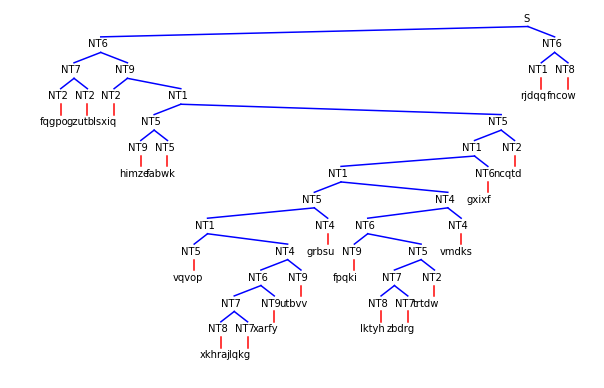

In [11]:
import uniformsampler
rng = numpy.random.RandomState(seed = seed)
max_length = 40

us = uniformsampler.UniformSampler(upcfg,max_length,rng)



t10 = us.sample(20)
print(t10)

print(utility.collect_yield(t10))
utility.plot_tree(t10)


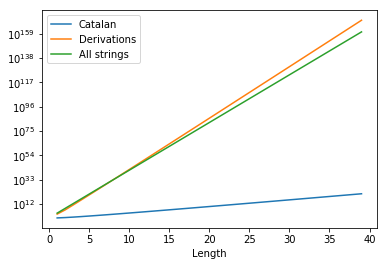

In [12]:

x = range(1,max_length)
plt.plot(x, [ utility.catalan_numbers(i) for i in x ], label="Catalan")
plt.plot(x, [ us.get_total(l) for l in x], label="Derivations")
plt.yscale('log')
#plt.xticks(x)
plt.xlabel("Length")
#plt.ylabel("Number of derivations")
plt.plot(x, [ len(upcfg.terminals) ** l for l in x ], label="All strings")
plt.legend()
plt.show()

The density of a language at length $n$ is the probability that a randomly selected (uniformly drawn) string of length $n$ has non zero probability; i.e. is in the support of the language. The crude method doesn't work well for low density languges; so we use a smarter way by sampling from derivations of strings of length $n$.
Note that this is entirely non-probabilistic.

In [13]:
x = []
yc = []
y = []
n_samples = 100
max_length = 20
for l in range(1,max_length):
    print(l)
    x.append(l)
    y.append(us.string_density(l,n_samples))
    yc.append(us.string_density_crude(l,n_samples))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


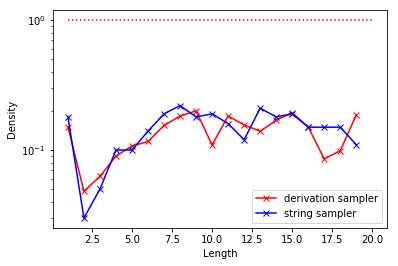

In [14]:

plt.plot(x,y,'rx-',label="derivation sampler")
plt.plot(x,yc,'bx-',label="string sampler")
plt.plot([1,max_length],[1.0,1.0],'r:')
plt.xlabel("Length")
plt.ylabel('Density')
plt.yscale('log')
#plt.xticks(range(1,max_length+1))
plt.legend()
plt.show()

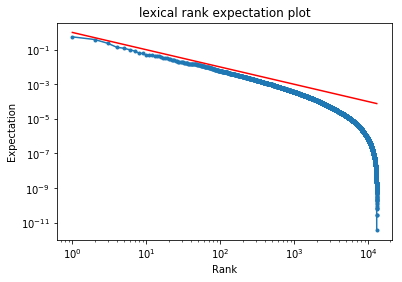

In [15]:
# Lexical distribution
te = upcfg.terminal_expectations()
probs = [ te[a] for a in te]
probs.sort(key = lambda x : -x)
ranks = np.arange(1, len(probs)+1)
plt.plot(ranks, probs, rasterized=True,marker=".")
n = len(te)
plt.plot([1,n],[1,1/n],'r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank')
plt.ylabel('Expectation')

plt.title("lexical rank expectation plot")
plt.show()

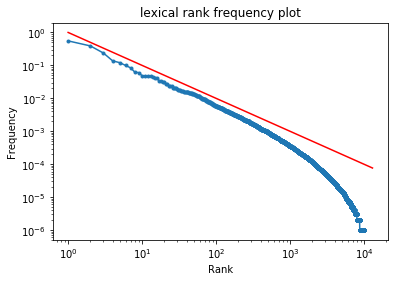

In [16]:
# sampled lexical distribution
n_samples = 1000000
lc = Counter()
for _ in range(n_samples):
    s = sampler.sample_string()
    for a in s:
        lc[a] += 1
probs = [lc[a]/n_samples for a in lc]

probs.sort(key = lambda x : -x)
ranks = np.arange(1, len(probs)+1)
plt.plot(ranks, probs, rasterized=True,marker=".")
n = len(te)
plt.plot([1,n],[1,1/n],'r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency')

plt.title("lexical rank frequency plot")
plt.show()

In [17]:
max(te.values())/upcfg.expected_length()

0.11850898717289121

In [18]:
# ambiguity: H(tree|string)
print("H(tree|string)=",upcfg.estimate_ambiguity(samples=1000,sampler=sampler))

H(tree|string)= 0.35069371712577607


In [19]:
# ambiguity ; derivations per string.
#sampler = pcfg.Sampler(upcfg)
counter = inside.InsideComputation(upcfg)
derivations = Counter()
strings = Counter()
max_length = 20
n_samples = int(1e3)
for i in range(n_samples):
    s = utility.collect_yield(sampler.sample_tree())
    l = len(s)
    if l <= max_length:
        n = counter.count_parses(s)
        strings[l] += 1
        derivations[l] += n


Text(0,0.5,'Mean derivations per string')

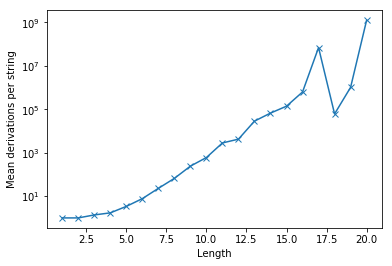

In [20]:
x = [list(strings)][0]
x.sort()
y = [ derivations[i]/strings[i] for i in x]
plt.plot(x,y,'x-')
plt.yscale('log')
plt.xlabel('Length')
plt.ylabel('Mean derivations per string')

Communicabiity is a measure of the ambiguity of a grammar; if it is 1 then the grammar is unaambiguous.
It is the probability of successful communication between two optimal agents both equipped with the same grammar.
The first samples a tree ($t_0$) from the distribution and transmits the yield ($s$) to the other who computes the most likely tree given that string $t_1$. If $t_0 = t_1$ then communication is successful.
We estimate this using  Monte Carlo methods.

$$\sum_{\tau} P(\tau) \mathbb{I}( \tau = viterbi(y(\tau))) \approx \sum_i \frac{1}{N} \mathbb{I}( \tau_i = viterbi(y(\tau_i)))$$

OR

$$\sum_{w} P(w) \frac{P(viterbi(w))}{P(w)}  \approx \sum_i \frac{1}{N} \frac{P(viterbi(w))}{P(w)}$$

In [21]:
%%time
upcfg.estimate_communicability(sampler=sampler)

CPU times: user 2.21 s, sys: 8.39 ms, total: 2.22 s
Wall time: 2.22 s


(0.894, 0.8924940240323588)